In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import math

In [38]:
device = "cpu"

In [46]:
#Create Test data
X_tensor = torch.tensor([n for n in range(0,500)]).type(torch.float32)
y_tensor = torch.tensor([10*math.sin(x/10) for x in range(0,500)])

In [48]:
X_tensor.type(), y_tensor.type()

('torch.FloatTensor', 'torch.FloatTensor')

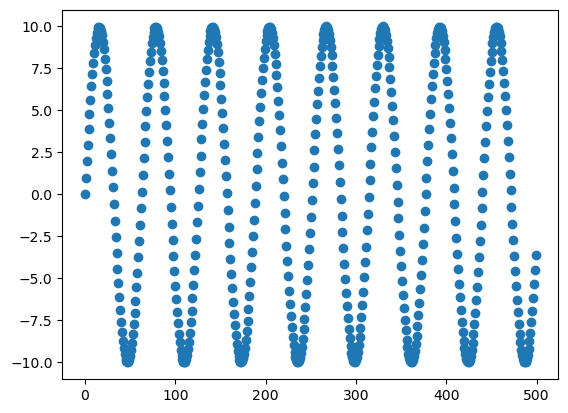

In [29]:
plt.scatter(x=X_tensor, y=y_tensor)

In [50]:
SPLIT_PERCENT = .8
train_split = int(len(X_tensor) * SPLIT_PERCENT)
X_train, y_train = X_tensor[:train_split], y_tensor[:train_split]
X_test, y_test = X_tensor[train_split:], y_tensor[train_split:]

In [52]:
X_train.shape, y_train.shape

(torch.Size([400]), torch.Size([400]))

In [60]:
X_train = X_train.unsqueeze(dim=1)
X_test = X_test.unsqueeze(dim=1)

In [53]:
class ModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=5)
        self.layer_3 = nn.Linear(in_features=5, out_features=1)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        return self.layer_3(self.sig(self.layer_2(self.sig(self.layer_1(x))))) 


model_0 = ModelV0().to(device)
model_0

ModelV0(
  (layer_1): Linear(in_features=1, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [35]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [62]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []
train_diff = []
test_diff = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

     ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_diff.append(abs(torch.mean(y_pred - y_train).detach().numpy()))
        test_diff.append(abs(torch.mean(test_pred - y_test).detach().numpy()))
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 10 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 20 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 30 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 40 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 50 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 60 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 70 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 80 | Loss: 6.39629 | Test Loss: 6.36657
Epoch: 90 | Loss: 6.39629 | Test Loss: 6.36657


In [64]:
model_0.eval()
with torch.inference_mode():
     y_preds = model_0(X_test)

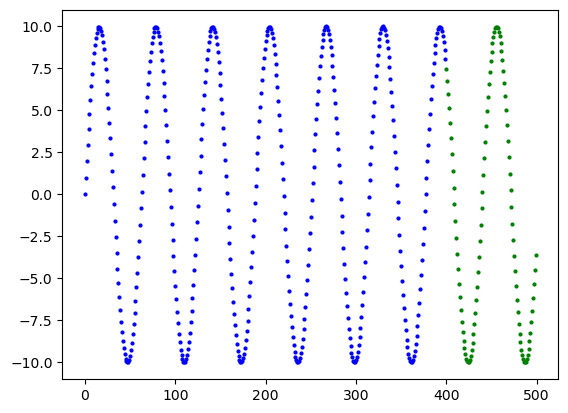

In [66]:
plt.scatter(X_train, y_train, c="b", s=4, label="Training data")
plt.scatter(X_test, y_test, c="g", s=4, label="Testing data")